# Kalman filter
https://filterpy.readthedocs.io/en/latest/kalman/KalmanFilter.html
https://github.com/selfedu-rus/python-algorithms/blob/master/lesson%206.%20filter%20kalman.py

In [3]:
# ! git clone -b ml_and_stat_methods https://github.com/mipt-nd/novelty-detection.git
# %cd novelty-detection/

In [8]:
! pip install filterpy -q

In [17]:
import os
import random
import sys

import pandas as pd

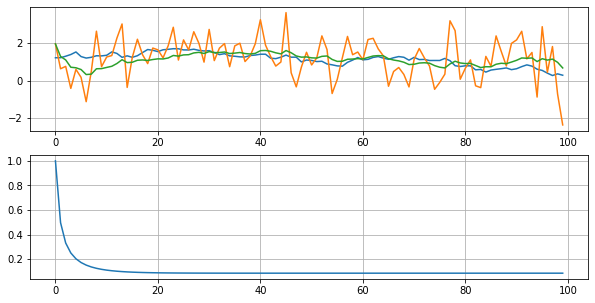

In [4]:
import numpy as np
import matplotlib.pyplot as plt

N = 100         # число наблюдений
dNoise = 1      # дисперсия шума
dSignal = 5     # дисперсия сигнала
r = 0.99        # коэффициент корреляции в модели движения
en = 0.1        # дисперсия СВ в модели движения

x = np.zeros(N)                         # истинные координаты перемещения (пока просто нули)
x[0] = np.random.normal(0, dSignal)     # формирование первой координаты
for i in range(1, N):                   # формирование последующих координат по модели АР
    x[i] = r*x[i-1] + np.random.normal(0, en)

z = x + np.random.normal(0, dNoise, N)  # формирование наблюдений


# фильтрация сигнала с помощью фильтра Калмана
xx = np.zeros(N)    # вектор для хранения оценок перемещений
P = np.zeros(N)     # вектор для хранения дисперсий ошибок оценивания
xx[0] = z[0]        # первая оценка
P[0] = dNoise      # дисперсия первой оценки

# рекуррентное вычисление оценок по фильтру Калмана
for i in range(1, N):
    Pe = r*r*P[i-1]+en*en
    P[i] = (Pe*dNoise)/(Pe+dNoise)
    xx[i] = r*xx[i-1]+P[i]/dNoise*(z[i]-r*xx[i-1])

# отображение результатов
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

ax1.plot(x)
ax1.plot(z)
ax1.plot(xx)
ax1.grid(True)

ax2.plot(P)
ax2.grid(True)
plt.show()

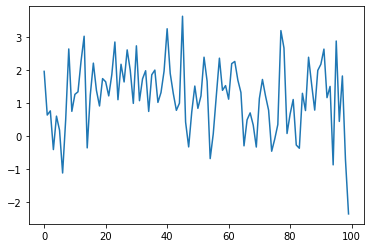

In [5]:
plt.plot(z)

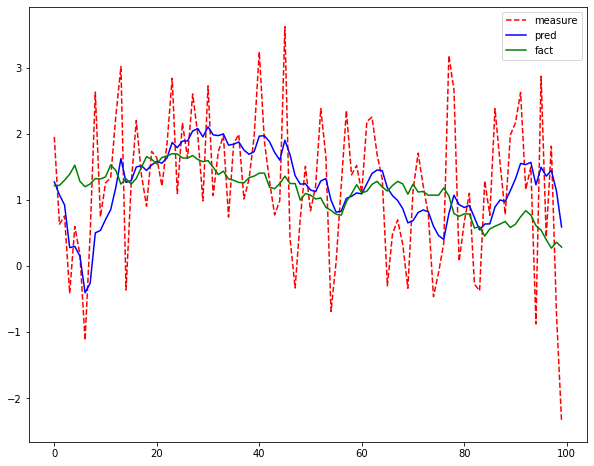

In [15]:
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
import numpy as np

f = KalmanFilter(dim_x=2, dim_z=1)
f.x = np.array([[1.], [0.]])  # initial state
f.F = np.array([[1.,1.], [0.,1.]])  # state transition matrix
f.H = np.array([[1.,0.]])  # measurement function matrix
f.P = np.array([[1., 0.], [0., 1.]])  # state covariance matrix
f.Q = Q_discrete_white_noise(dim=2, dt=0.1, var=0.1)  # process noise matrix
f.R = np.array([[5.]])  # measurement noise matrix

preds = []

for measure in z:
    f.predict()
    f.update(measure)
    preds.append(f.x_post[0][0])
    
plt.figure(figsize=(10, 8))
plt.plot(z, 'r--', label='measure')
plt.plot(preds, 'b', label='pred')
plt.plot(x, 'g', label='fact')
plt.legend()
plt.show()

# Datasets

In [23]:
# SKAB data

all_files=[]
for root, dirs, files in os.walk("data/skab/"):
    for file in files:
        if file.endswith(".csv"):
             all_files.append(os.path.join(root, file))

# формируем датафрейм
dfs=[]
for path in all_files:
    df = pd.read_csv(path,index_col='datetime',sep=';',parse_dates=True)
    # print(path, df.shape)
    dfs.append(df)
# print('Features:')
# for col in dfs[2].columns:
#     print('\t',col)
dfs = [df for df in dfs if df.shape[1] == 10]
df_skab = pd.concat(dfs)
# print(df_skab.shape)
df_skab = df_skab.drop_duplicates()
df_skab = df_skab.drop('changepoint', axis=1).sort_index()
display(df_skab)

,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly
datetime,,,,,,,,,
2020-02-08 16:06:48,0.213628,0.266664,2.588900,-0.273216,89.1732,29.3477,231.257,125.3240,0.0
2020-02-08 16:06:49,0.214988,0.267634,2.994500,0.382638,89.3237,29.3409,234.948,125.6780,0.0
2020-02-08 16:06:50,0.212976,0.268121,2.849810,0.054711,88.9180,29.3450,208.112,125.3240,0.0
2020-02-08 16:06:51,0.214286,0.267545,2.884770,-0.273216,89.0148,29.3459,206.579,125.6780,0.0
2020-02-08 16:06:52,0.213402,0.266691,2.595010,0.382638,88.9571,29.3462,223.472,125.3240,0.0
...,...,...,...,...,...,...,...,...,...
2020-03-09 17:14:04,0.026853,0.038926,0.740614,0.054711,69.6371,24.1045,237.276,32.0451,0.0
2020-03-09 17:14:05,0.027067,0.038430,0.988875,0.054711,69.6731,24.1046,230.729,32.9562,0.0
2020-03-09 17:14:07,0.027582,0.038836,0.588439,0.054711,69.6959,24.1020,233.443,32.0000,0.0


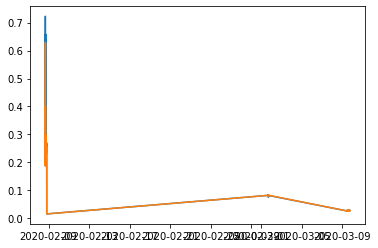

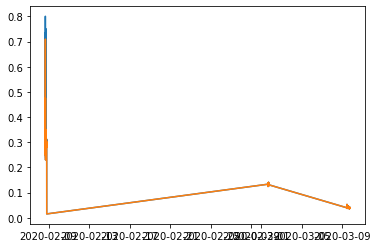

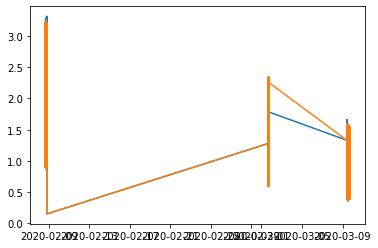

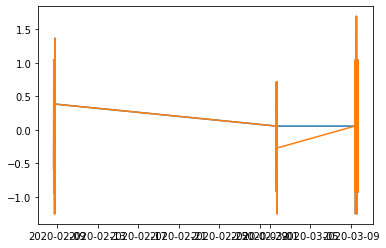

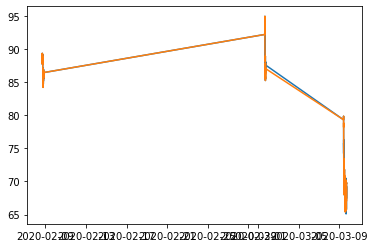

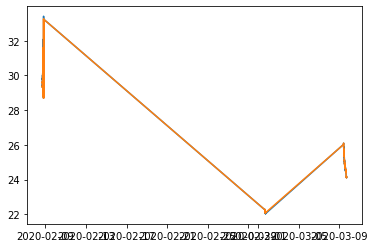

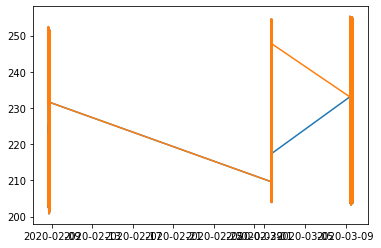

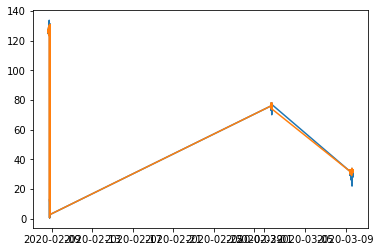

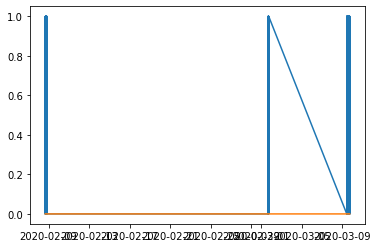

In [31]:
for col in df_skab.columns:
    plt.plot(df_skab[col])
    plt.plot(df_skab[df_skab['anomaly'] == 0][col])
    plt.show()

In [66]:
def kalman_filter(z, x):
    f = KalmanFilter(dim_x=2, dim_z=1)
    f.x = np.array([[1.], [0.]])  # initial state
    f.F = np.array([[1.,1.], [0.,1.]])  # state transition matrix
    f.H = np.array([[1.,0.]])  # measurement function matrix
    f.P = np.array([[1., 0.], [0., 1.]])  # state covariance matrix
    f.Q = Q_discrete_white_noise(dim=2, dt=0.1, var=0.1)  # process noise matrix
    f.R = np.array([[5.]])  # measurement noise matrix

    pred_list = []

    for measure in z:
        f.predict()
        f.update(measure)
        pred_list.append(f.x_post[0][0])

    preds = pd.Series(data=pred_list, index=z.index)
        
    plt.figure(figsize=(10, 8))
    plt.plot(z, 'r--', label='measure')
    plt.plot(preds, '--b', label='pred')
    plt.plot(x, 'g', label='fact')
    plt.legend()
    plt.show()

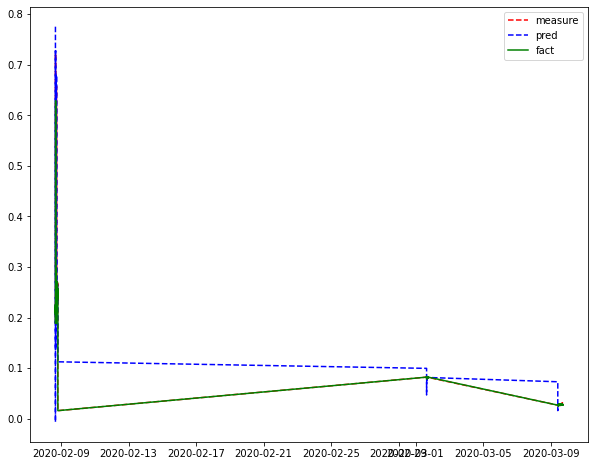

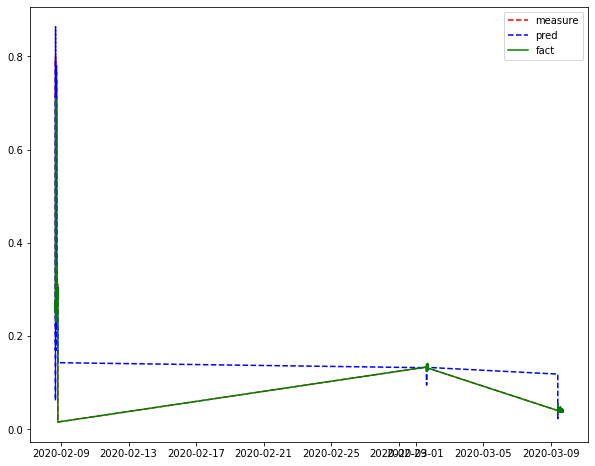

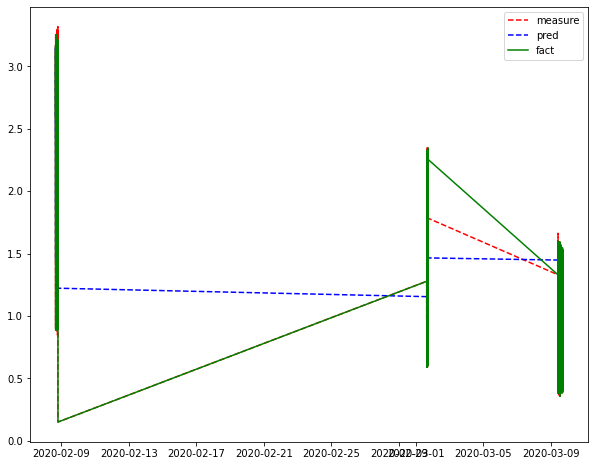

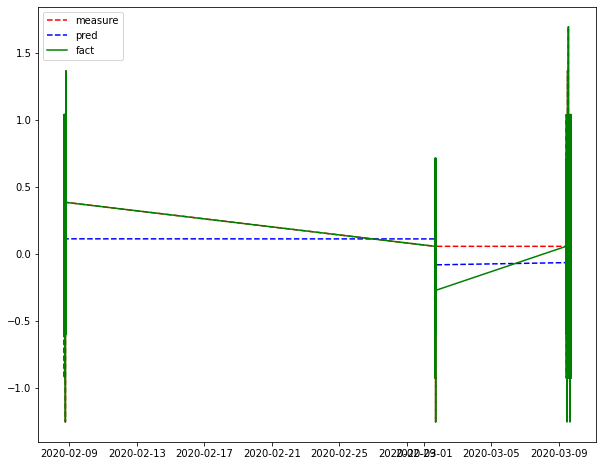

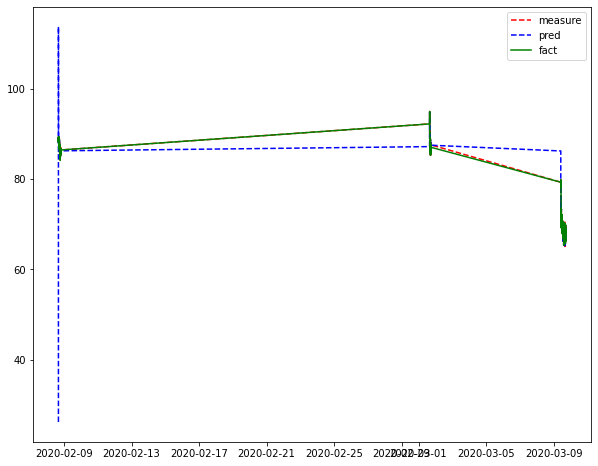

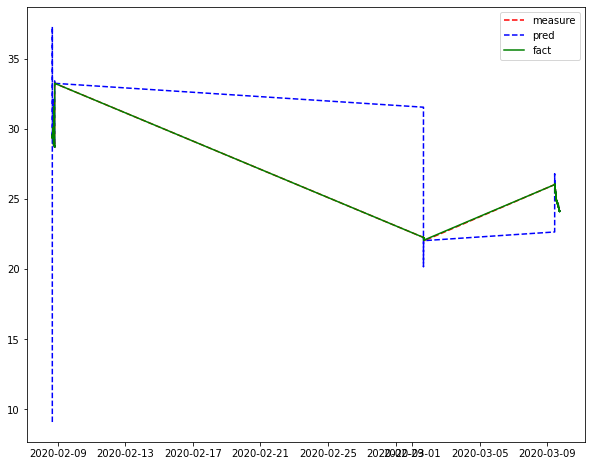

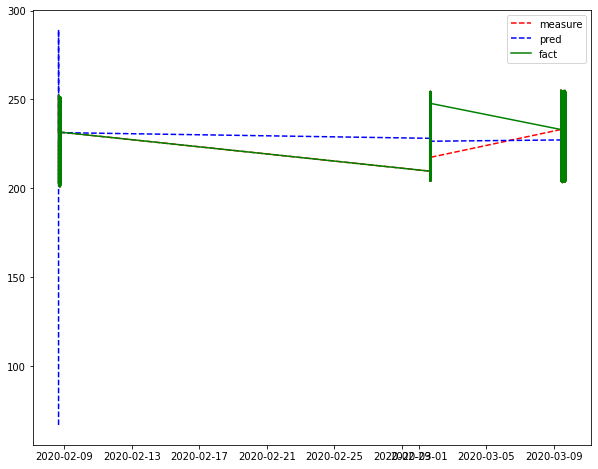

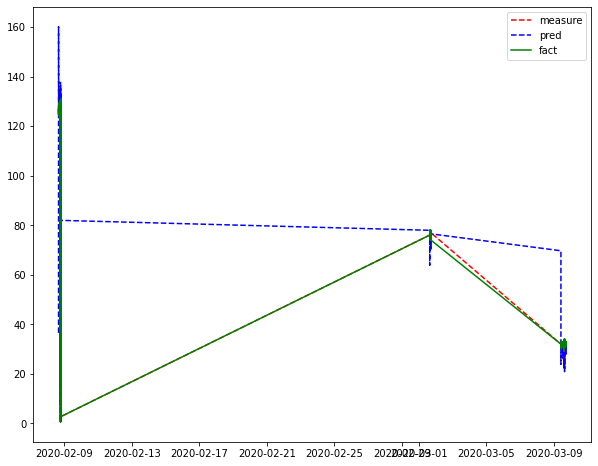

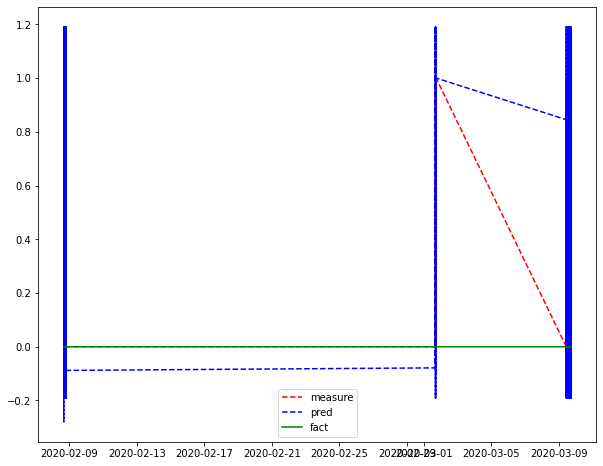

In [68]:
for col in df_skab.columns:
    kalman_filter(df_skab[col], df_skab[df_skab['anomaly'] == 0][col])